In [15]:
import datetime as dt
import pandas as pd

from de.processor.dart import DART_FUNDAMENTAL_PROCESSOR
from de.processor.fdr import FDR_INFO_PROCESSOR, FDR_OHLCV_PREPROCESSOR

from de.processor.factor.fundamental import FUNDAMENTAL_FACTOR_PROCESSOR
from de.processor.factor.technical import LINEAR_COEFFICENT_FACTOR_PROCESSOR
from de.processor.factor.technical import MOVING_AVERAGE_FACTOR_PROCESSOR

from de.analyser.factor import FACTOR_ANALYSER
from de.visualizer import ANALYSIS_VISUALIZER

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False

In [16]:
CFG = {
    "FUNDAMENTAL": {
        "PROCESSOR": {
            "ohlcv_recent_n": 10,
        }
    },
    #
    "LINEAR_COEF": {
        "PROCESSOR": {
            "factors": ["Close", "VolumeRotation"],
            "moving_average_window": 10,
            "coef_recent_n": 30,
        }
    },
    #
    "MOVING_AVERAGE": {
        "PROCESSOR": {
            "factors": ["Close", "VolumeRotation"],
            "short_term_window": round((7 * 2) * (5 / 7)),
            "long_term_window": round((7 * 8) * (5 / 7)),
            "signal_recent_n": 20,
        }
    },
    #
    "FACTOR_ANALYSIS": {
        "profit_recent_n": 20,
    },
}
recen_n = CFG["FACTOR_ANALYSIS"]["profit_recent_n"]
analysis_date = (dt.date.today() - dt.timedelta(days=recen_n)).strftime("%Y-%m-%d")
CFG["analysis_date"] = analysis_date

In [17]:
# Load

In [18]:
# dart_fundamental
dart_fundamental_df = pd.read_csv("./de/data/dart_fundamental_df.csv", index_col=0)
dart_fundamental_processor = DART_FUNDAMENTAL_PROCESSOR(dart_fundamental_df)

In [19]:
# fdr_info
fdr_info_df = pd.read_csv("./de/data/fdr_info_df.csv", index_col=0)
fdr_info_processor = FDR_INFO_PROCESSOR(fdr_info_df)

In [20]:
# fdr_ohlcv
fdr_ohlcv_df = pd.read_csv("./de/data/fdr_ohlcv_df.csv", index_col=0)
fdr_ohlcv_preprocessor = FDR_OHLCV_PREPROCESSOR(fdr_ohlcv_df)
pps_fdr_ohlcv_df = fdr_ohlcv_preprocessor.get_pps_fdr_ohlcv_df()

In [21]:
# split ohlcv
future_ohlcv_df = pps_fdr_ohlcv_df[CFG["analysis_date"] < pps_fdr_ohlcv_df["Date"]].copy()
past_ohlcv_df = pps_fdr_ohlcv_df[pps_fdr_ohlcv_df["Date"] < CFG["analysis_date"]].copy()

In [22]:
analysis_visualizer = ANALYSIS_VISUALIZER(future_ohlcv_df)

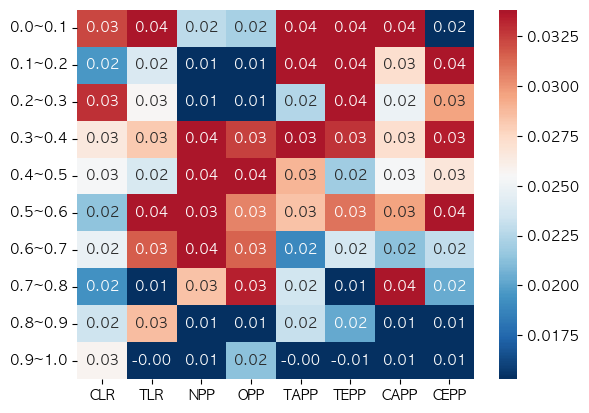

In [23]:
# fundamental_analysis

## fundamental_factors_df

fundamental_factor_processor = FUNDAMENTAL_FACTOR_PROCESSOR(
    past_ohlcv_df, dart_fundamental_processor, fdr_info_processor
)
fundamental_factors_df = fundamental_factor_processor.get_fundamental_factor_df(CFG["FUNDAMENTAL"]["PROCESSOR"])

## fundamental_factor_analyser
fundamental_factor_analyser = FACTOR_ANALYSER(fundamental_factors_df)
analysis_visualizer.show_1d_heatmap(fundamental_factor_analyser, CFG["FACTOR_ANALYSIS"])

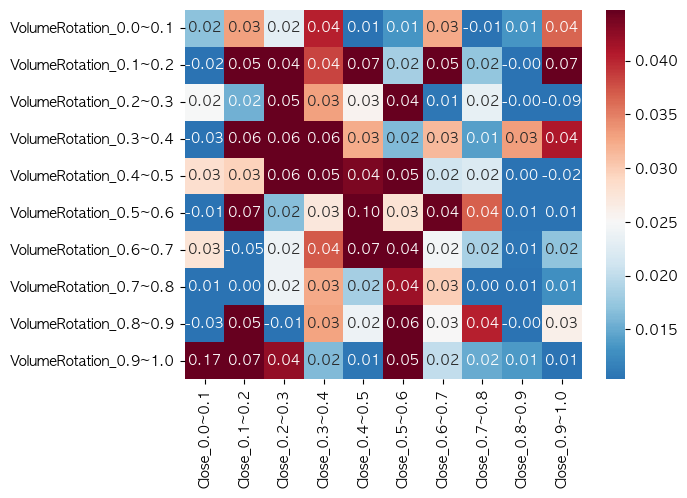

In [24]:
# Technical_analysis

## linear_coef_factors_df
linear_coefficent_factor_processor = LINEAR_COEFFICENT_FACTOR_PROCESSOR(past_ohlcv_df, fdr_info_processor)
linear_coef_factors_df = linear_coefficent_factor_processor.get_linear_coef_factor_df(CFG["LINEAR_COEF"]["PROCESSOR"])

## linear_coef_factor_analyser
linear_coef_factor_analyser = FACTOR_ANALYSER(linear_coef_factors_df)
analysis_visualizer.show_2d_heatmap(
    linear_coef_factor_analyser, CFG["FACTOR_ANALYSIS"], ["Close", "VolumeRotation"]
)

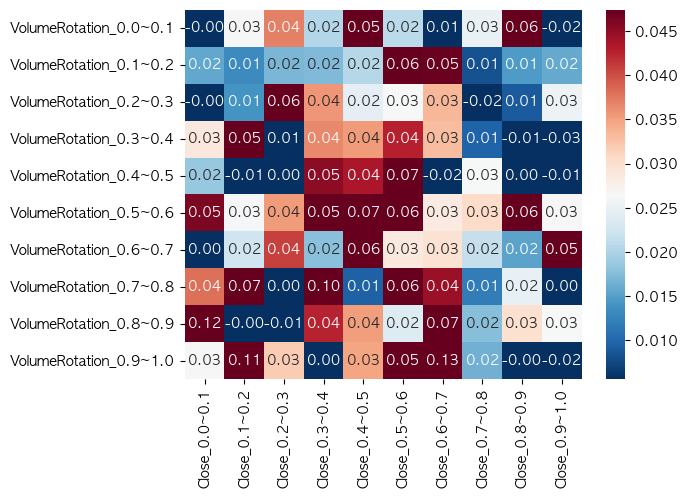

In [25]:
# Technical_analysis

## moving_average_factor_df
moving_average_factor_processor = MOVING_AVERAGE_FACTOR_PROCESSOR(past_ohlcv_df, fdr_info_processor)
moving_average_factor_df = moving_average_factor_processor.get_moving_average_factor_df(
    CFG["MOVING_AVERAGE"]["PROCESSOR"]
)
## moving_average_factor_analyser
moving_average_factor_analyser = FACTOR_ANALYSER(moving_average_factor_df)
analysis_visualizer.show_2d_heatmap(
    moving_average_factor_analyser, CFG["FACTOR_ANALYSIS"], ["Close", "VolumeRotation"]
)